# "Análisis de Tendencias, Estacionalidades y Crecimiento en las Vistas del Foro de freeCodeCamp (2016-2019)"

📝Introducción del Proyecto:

Este proyecto analiza las tendencias y estacionalidades en las vistas diarias del foro de freeCodeCamp desde mayo de 2016 hasta diciembre de 2019. A través de visualizaciones gráficas como gráficos de líneas, barras y diagramas de caja, se exploran patrones de crecimiento, picos de actividad y variaciones estacionales. Este análisis proporciona información clave sobre la evolución del tráfico en la plataforma, permitiendo identificar oportunidades para mejorar la participación de los usuarios y optimizar estrategias de contenido y marketing. Además, se aborda la limpieza de datos para garantizar la precisión y representatividad de los resultados obtenidos.

✅Puedes descargar el set de datos aquí: 👉👉 https://github.com/WLozanoH/freeCodeCamp-Forum-Pageviews-Analysis/blob/main/fcc-forum-pageviews.zip

In [240]:
#Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [241]:
#Importamos la data a un df

# Usamos parse_dates['date'] para convertir la columna 'date' a tipo 'datetime'
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [242]:
#Observamos los primeros y ultimos valores para dar una idea de la distribución de los datos
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


📌 Se limpiarán los datos eliminando los días cuyas vistas de página se encuentren en el 2.5% más bajo y el 2.5% más alto del conjunto, asegurando un análisis más representativo.

In [243]:
lower_limit = df['value'].quantile(0.025) #2.5 más bajo
upper_limit = df['value'].quantile(0.975) #2.5 más alto

#filtrando la data
print(df.shape)
df_filtered = df[(df['value'] >= lower_limit) & (df['value'] <= upper_limit)]
print(df_filtered.shape)

(1304, 1)
(1238, 1)


📌 Se creará una función denominada Draw_line_plot utilizando Matplotlib para generar un gráfico de líneas que represente las vistas diarias del foro de freeCodeCamp entre mayo de 2016 y diciembre de 2019. El gráfico incluirá un título descriptivo: "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". Además, se etiquetarán claramente los ejes: el eje x con "Date" y el eje y con "Page Views", asegurando una visualización clara y profesional de las tendencias temporales.

In [244]:
def Draw_line_plot(df):
    #creamos el tamño de la figura y el gráfico de líneas
    plt.figure(figsize=(15,5))
    sns.lineplot(x=df.index, y='value', data=df, color='red', linewidth=0.8)
    
    #Añadimos título y etiqueta a los ejes
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', fontsize = 15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Page Views', fontsize=12)
    
    #Ajustamos el diseño del gráfico
    plt.tight_layout()
    
    #Mostramos el gráfico
    plt.show()

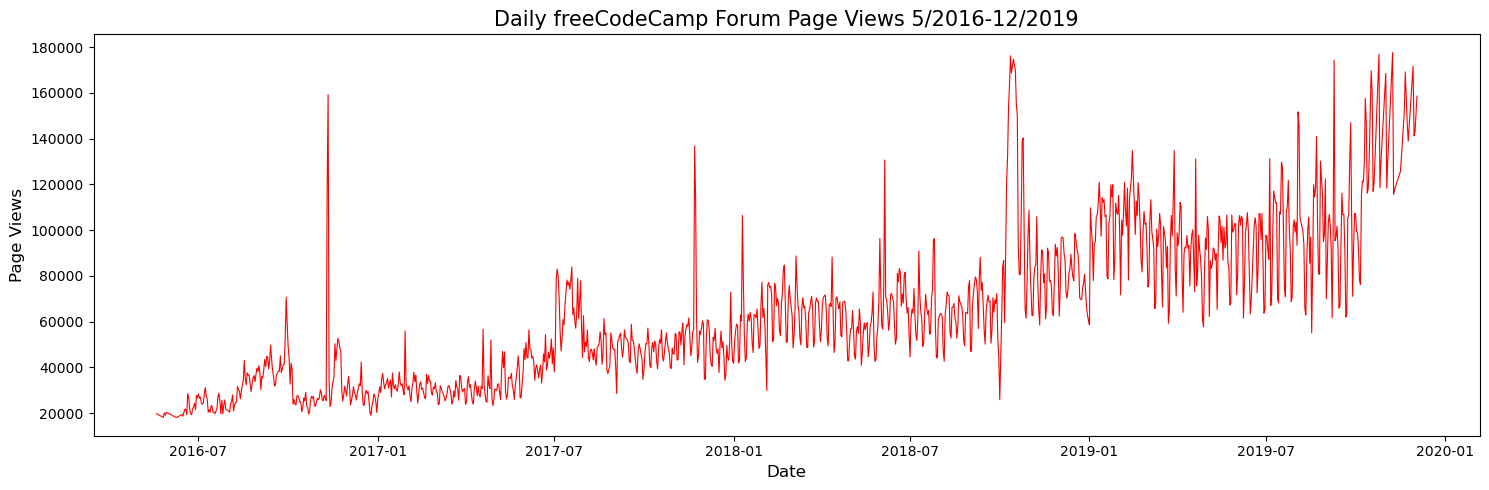

In [245]:
Draw_line_plot(df_filtered)

📝Resumen del Análisis del Gráfico

1. Tendencia General: El número de vistas diarias del foro de freeCodeCamp muestra un crecimiento sostenido desde 2016 hasta 2019, indicando un aumento constante en la popularidad y participación de los usuarios.

2. Picos Destacados: Se identifican picos significativos en 2017 y 2019, probablemente asociados a eventos clave o lanzamientos importantes en la plataforma.

3. Aumento de Variabilidad: A medida que pasa el tiempo, las vistas diarias muestran mayor variabilidad, reflejando un tráfico más dinámico y una base de usuarios creciente.

4. Crecimiento Acelerado en 2019: La tendencia alcista se vuelve más marcada hacia finales de 2019, lo que sugiere un período de expansión más rápida.

📌 Se desarrollará una función llamada draw_bar_plot que generará un gráfico de barras utilizando Matplotlib o Seaborn. Este gráfico representará el promedio diario de vistas a la página para cada mes, agrupadas por año, permitiendo comparar la actividad mensual entre diferentes años. La leyenda del gráfico incluirá los nombres de los meses y llevará el título "Months". Además, se etiquetarán claramente los ejes: el eje x como "Years" y el eje y como "Average Page Views", asegurando una visualización clara y estructurada de las tendencias promedio mensuales.

In [246]:
def draw_bar_plot(df):
    df_bar = df.resample('ME').mean()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    #Pivotar los datos para organizar los años como índice y los meses como columnas
    df_pivot = df_bar.pivot_table(index = 'year', columns= 'month', values = 'value')
    
    # Ordenamos los meses en el orden correcto
    df_pivot = df_pivot[['January', 'February', 'March','April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December']]
    
    # Creamos la figura y el gráfico de barras
    df_pivot.plot(kind = 'bar', figsize = (10,6), width = 0.6)
    
    #Añadimos el título y etiquetas
    plt.title('Average daily page views for each month (grouped by year)', fontsize = 15)
    plt.xlabel('Years', fontsize = 12)
    plt.ylabel('Average Page Views', fontsize = 12)
    
    #Añadimos la leyenda con el título de 'Months'
    plt.legend(title = 'Months')
    
    #Ajustar el diseño del gráfico
    plt.tight_layout()
    
    #Mostrar el gráfico
    plt.show()
    

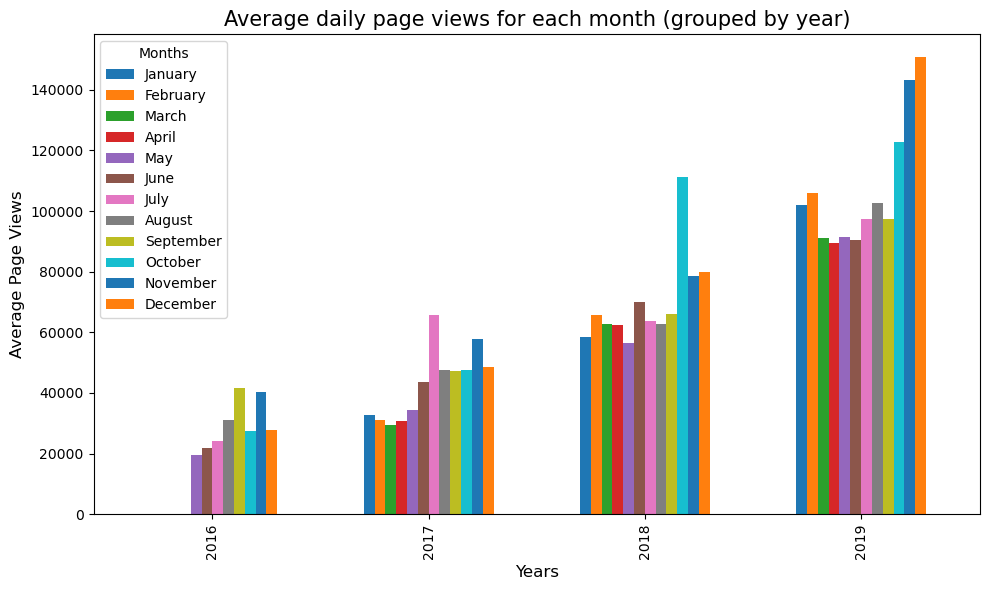

In [247]:
draw_bar_plot(df_filtered)


📝Resumen del Análisis del Gráfico de Barras

1. Crecimiento Sostenido: El promedio diario de vistas aumenta constantemente desde 2016 hasta 2019, mostrando un crecimiento en la popularidad del foro.

2. Meses Destacados: Diciembre, junio y septiembre presentan mayor actividad promedio, indicando patrones estacionales clave.

3. Mayor Actividad en 2019: Este año lidera en promedio de vistas diarias, destacando diciembre de 2019 como el mes con mayor participación.

4. Recomendación: Aprovechar meses de alta actividad para lanzamientos clave y planificar estrategias para aumentar el tráfico en meses de menor participación, como febrero.


📌 Se desarrollará una función denominada draw_box_plot utilizando Seaborn para generar dos diagramas de caja adyacentes. El primer diagrama, titulado "Year-wise Box Plot (Trend)", mostrará cómo se distribuyen los valores dentro de cada año, destacando tendencias anuales. El segundo diagrama, titulado "Month-wise Box Plot (Seasonality)", representará la distribución de valores por mes, permitiendo identificar patrones estacionales. Se asegurará que los meses en el eje x estén ordenados comenzando por enero (Jan), y que tanto los ejes x como y estén correctamente etiquetados para facilitar la interpretación.

In [248]:
df_box = df.copy()
df_box['year'] = df_box.index.year
df_box['month'] = df_box.index.month_name()
df_box['month'] = pd.Categorical(
    df_box['month'],
    categories= ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
    )
df_box.head()

,value,year,month
date,,,
2016-05-09,1201,2016,May
2016-05-10,2329,2016,May
2016-05-11,1716,2016,May
2016-05-12,10539,2016,May
2016-05-13,6933,2016,May


In [249]:
#definimos la función
def draw_box_plot(df):
    # Copia del dataframe original para no modificar los datos originales.
    df_box = df.copy()
    
    # Añadir columnas adicionales para 'year' (año) y 'month' (nombre del mes)
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.month_name()
    
    # Ordenar los meses para que aparezcan en el orden cronológico (enero a diciembre)
    df_box['month'] = pd.Categorical(
        df_box['month'],
        categories= ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December'],
        ordered=True
        )
    # Crear una figura con dos subgráficos adyacentes (boxplots)
    fig,axes = plt.subplots(1,2, figsize = (15,5)) #nrows = 1, ncols = 2
    
    # Gráfico 1: 'Year-wise Box Plot (Trend)'
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], palette ='coolwarm')
    axes[0].set_title('Year-wise Box Plot (Trend)', fontsize = 15)
    axes[0].set_xlabel('Year', fontsize = 12)
    axes[0].set_ylabel('Page views', fontsize = 12)
    
    # Gráfico 2: 'Month-wise Box Plot (Seasonality)'
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], palette = 'Set2')
    axes[1].set_title('Year-wise Box Plot (Trend)', fontsize = 15)
    axes[1].set_xlabel('Month', fontsize = 12)
    axes[1].set_ylabel('Page views', fontsize = 12)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 25)
    
    #Ajustamos el gráfico
    plt.tight_layout()

    #Mostramos el gráfico
    plt.show()

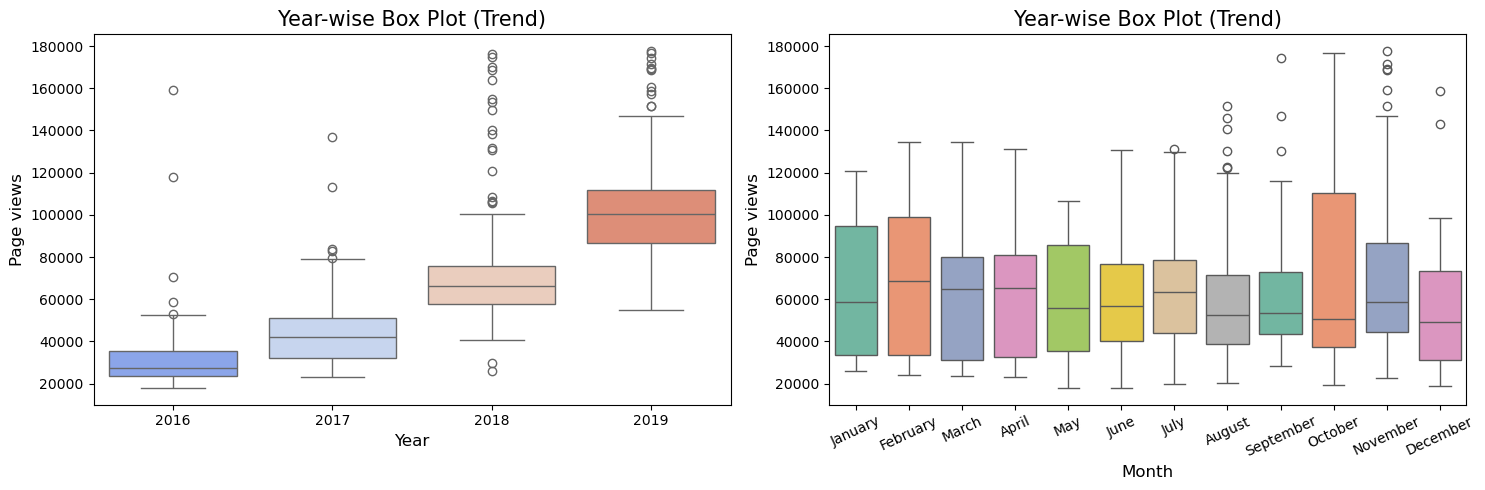

In [250]:
draw_box_plot(df_filtered)

📝Resumen del Análisis

1. Crecimiento Anual: Las vistas diarias aumentan consistentemente de 2016 a 2019, con mayor variabilidad en 2019, indicando una base de usuarios más amplia y activa.

2. Patrones Estacionales: Octubre y diciembre destacan con mayor actividad promedio, mientras que febrero y julio muestran menor participación.

3. Outliers (Valores Atípicos): Presentes en todos los meses, reflejan picos de tráfico en días específicos, probablemente asociados a eventos importantes.

📝Conclusión: El foro muestra un crecimiento sostenido y patrones estacionales claros, lo que sugiere la necesidad de estrategias específicas para maximizar la interacción en meses clave y analizar eventos que generan picos de actividad.

📝Conclusión del Proyecto

El proyecto identificó un crecimiento sostenido en las vistas del foro de freeCodeCamp (2016-2019) y patrones estacionales clave, con mayor actividad en octubre y diciembre y menor en febrero y julio. Se eliminaron valores atípicos para mejorar la precisión, y se detectaron picos de tráfico vinculados a eventos específicos. Las técnicas de limpieza, análisis de series temporales y visualización permitieron obtener insights valiosos para optimizar estrategias futuras, como campañas en meses activos y contenidos para equilibrar el tráfico.